<a href="https://colab.research.google.com/github/acucenarodrigues1998/TutorialPyBR2023-GenAINotebooks/blob/main/Tutorial_PyBR_01_Remo%C3%A7%C3%A3o_de_Ru%C3%ADdos_com_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Remoção de Ruídos com Autoencoder - Tutorial PyBR

## Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras.layers import Dense ,Conv2D ,Conv2DTranspose , MaxPooling2D ,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Carregando o dataset e visualizando algumas amostras

In [ ]:
# Carregando a base mnist direto do tensorflow
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step



Classe: 7



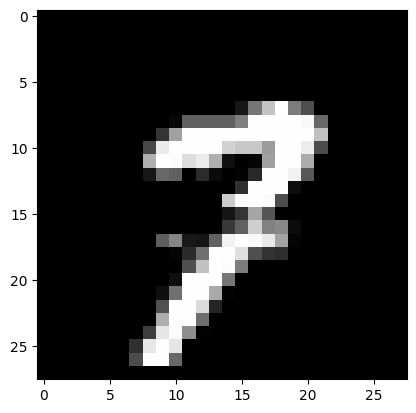

In [ ]:
# Visualização de uma imagem da base
i = random.randint(1,60000) # Selecinando um index aleatório para a imagem que será mostrada

plt.imshow(X_train[i] , cmap = 'gray') # plot da imagem
label = y_train[i]
print(f"\nClasse: {label}\n")

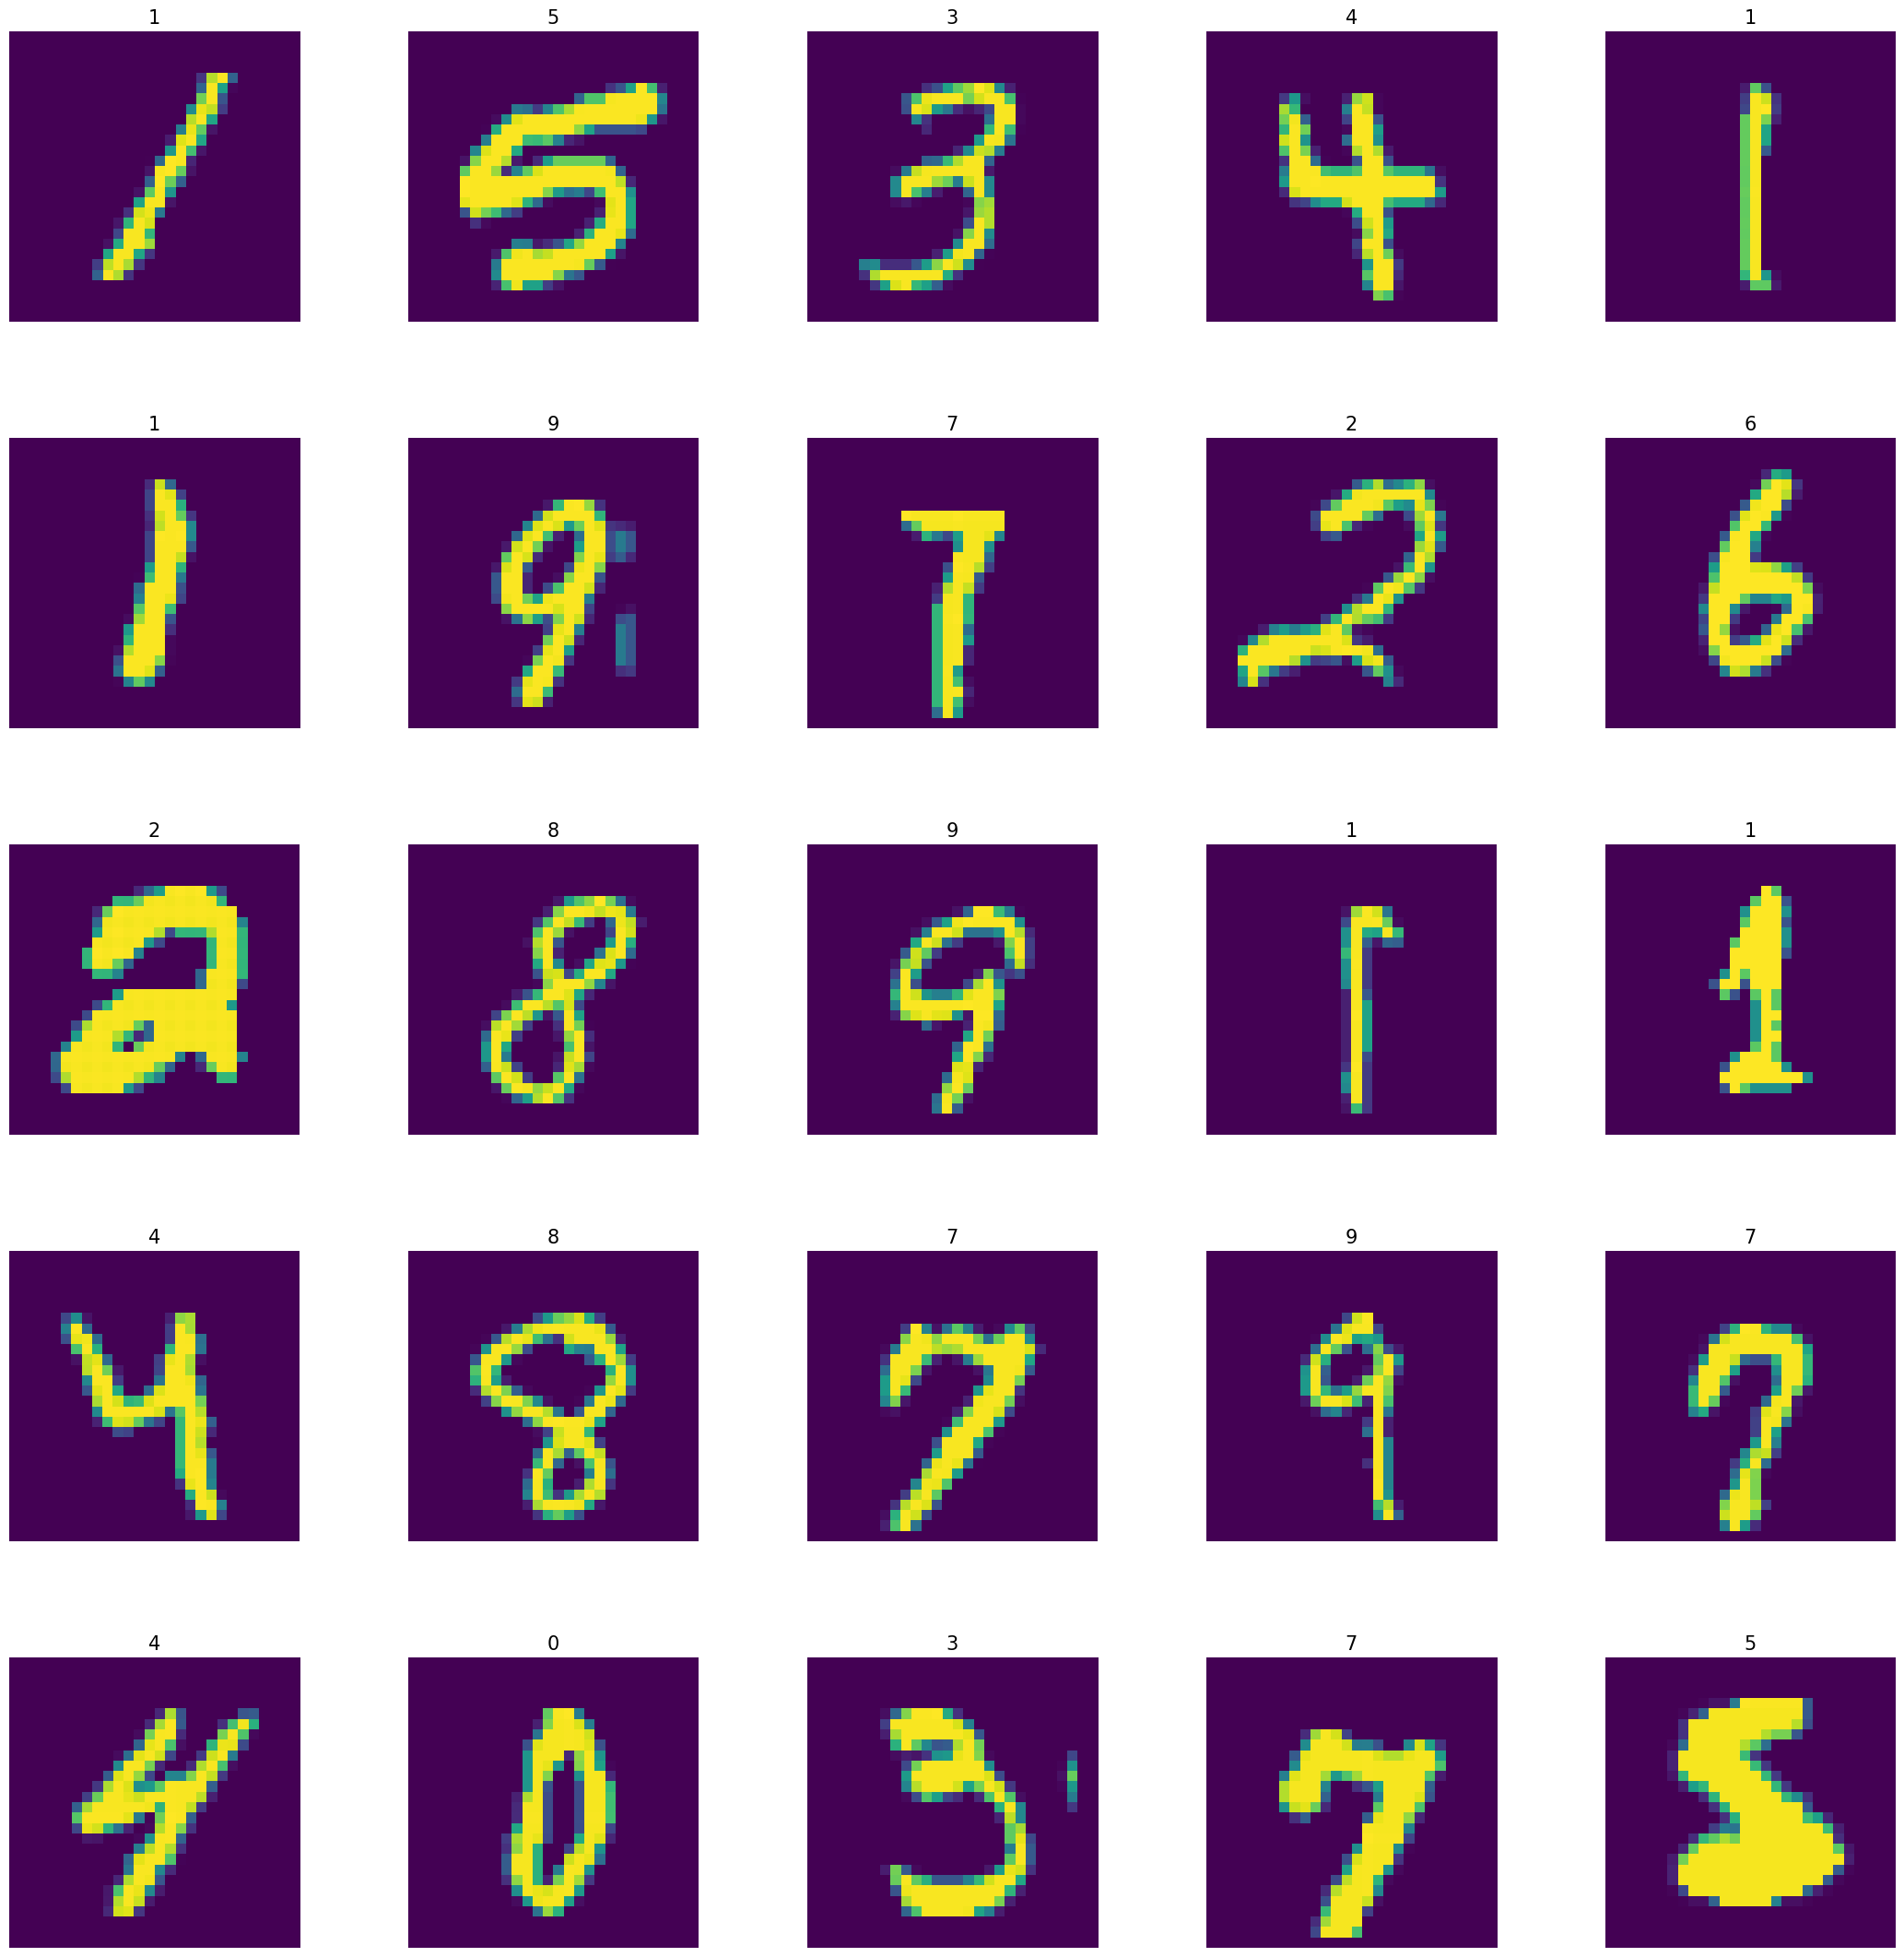

In [ ]:
# Visualização de mais algumas imagens em grid
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (27,27))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Preparando o dataset

In [ ]:
# Let's normalize the data
X_train = X_train / 255
X_test = X_test / 255

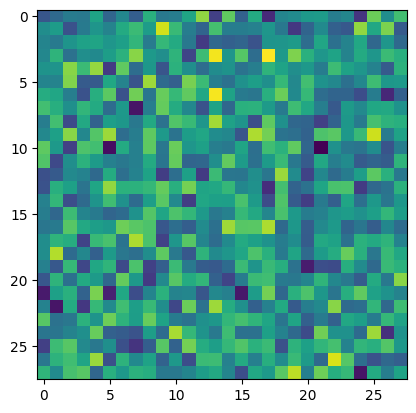

In [ ]:
# Let's create some noise with the same dimensions as the original image (28,28)
added_noise = np.random.randn(*(28,28))
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))
plt.imshow(added_noise)

In [ ]:
# Let's do the same operation over all the images contained in the training dataset
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)
X_train_noisy = np.array(X_train_noisy)

In [ ]:
# Let's do the same operation for the testing dataset as well
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)
X_test_noisy = np.array(X_test_noisy)

In [ ]:
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

## Construindo o autoencoder

In [ ]:
autoencoder = models.Sequential()

#Encoding
autoencoder.add(Conv2D(25,(3,3),strides=1,padding='same',input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2,2),padding='same'))
autoencoder.add(Conv2D(12,(3,3),strides=1,padding='same'))
autoencoder.add(MaxPooling2D((2,2),padding='same'))

# Encoded image (code layer)
autoencoder.add(Conv2D(15,(3,3),strides=1,padding='same'))

# Decoding
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2DTranspose(25,(3,3),strides=1,padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2DTranspose(1,(3,3),strides=1,padding='same',activation='sigmoid'))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 12)        2712      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          1635      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

## Treinando o modelo

In [ ]:
autoencoder.fit(X_train_noisy,
                X_train,
                epochs=10,
                batch_size=200)

Epoch 1/10
300/300 [==============================] - 13s 5ms/step - loss: 0.1594
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0955
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0907
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0884
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0868
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0856
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0847
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0840
Epoch 9/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0833
Epoch 10/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0828


## Avaliando os resultados

1/1 [==============================] - 0s 387ms/step


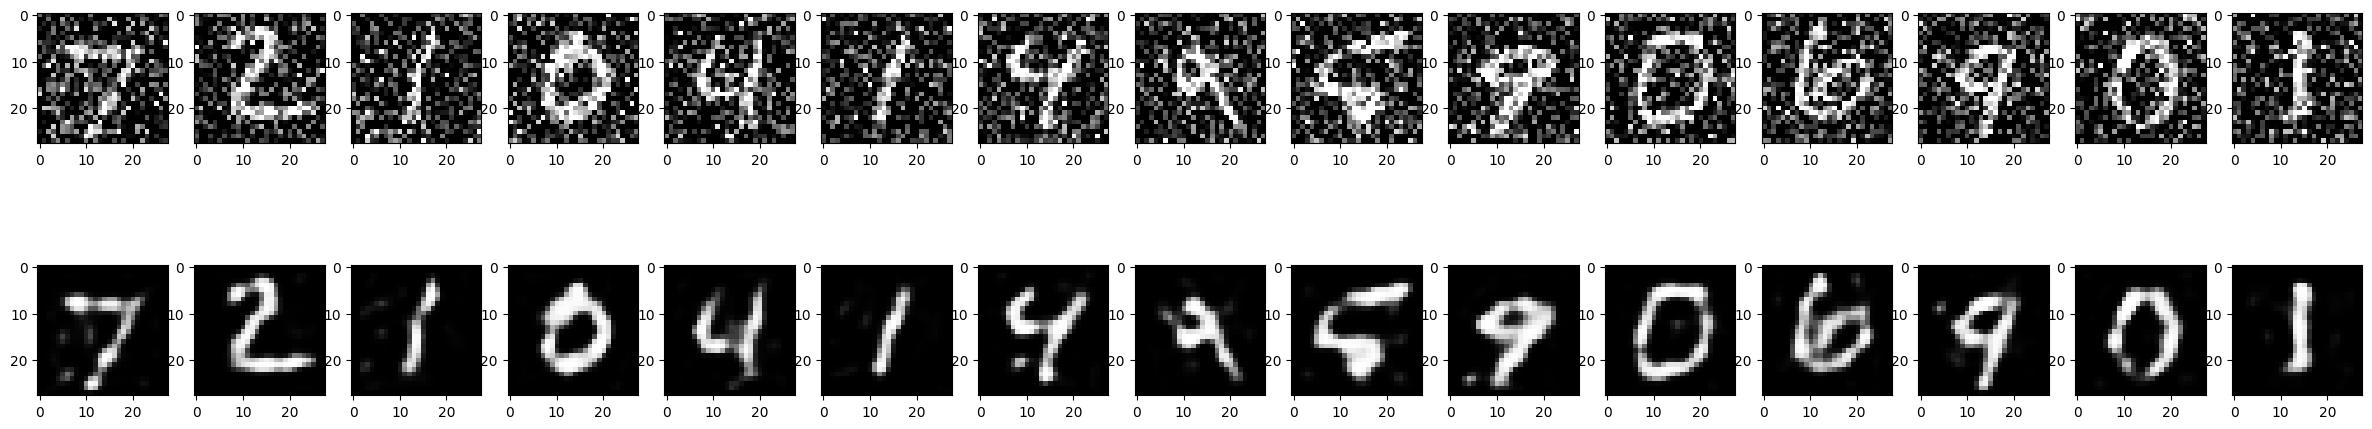

In [ ]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')